# **Face Recognition**


---

### Youssef Hassan (6259)
###Nour El-Din Hazem (6261)


---

[link to the project](https://colab.research.google.com/drive/1iD1hnBZ1CspFNo3nqX3ma7-2WRHAsJ6t?usp=sharing)

Connecting to the drive to load dataset

---



In [ ]:
from google.colab import drive  
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Generating the Data Matrix and the Label vector

---



In [ ]:
import numpy as np
import cv2

labels = []
data = []
for i in range(1, 41):  # accessing folders of directory
        for k in range(1, 11):  # accessing photos in each folder
            img = cv2.imread('/content/gdrive/MyDrive/Dataset'+'/s'+str(i)+"/"+str(k)+'.pgm', 0)
           # height1, width1 = img.shape[:2]
            img_col = np.array(img, dtype='float64').flatten()  # converting image to 1 dimentional image
            subject = int(i)
            data.append(img_col)
            labels.append(subject)

data = np.array(data)

# **PCA** 

---



---



Function to Split the Dataset into Training and Test sets (odd for training & even for testing)

---



In [ ]:
def split(data,x,step):
  train = data[1::step]  
  train_labels = x[1::step]
  test = data[::step]  
  test_labels = x[::step]
  test = np.array(test)
  train = np.array(train)
  test_labels=np.array(test_labels)
  train_labels=np.array(train_labels)
  return train,train_labels,test,test_labels

Function to calculate the covariance

---



In [ ]:
def cov(train):
  mean = train.mean(axis=0)
  mean = np.array(mean)
  centered_data = train - mean.transpose()
  centered_data = np.array(centered_data)
  covariance = (np.dot(centered_data.transpose(), centered_data)) / train.shape[0]
  return covariance

Calculating the eigen values & eigen vectors in the PCA method 

---



In [ ]:
train,train_labels,test,test_labels=split(data,labels,2)
covariance=cov(train)
eigen_value, eigen_vector = np.linalg.eigh(covariance)


Function to calculate the explained variance

---



In [ ]:
def exp_var(eigen_values):
  total_varriance=np.sum(eigen_values)
  alpha = [0.8, 0.85, 0.9, 0.95]
  explained_variance=[]
  for j in range(len(alpha)):
      temp = 0
      R = []
      for i in range(1, eigen_values.shape[0]+1):
          temp += eigen_values[-i] / total_varriance
          R.append(temp)
          if temp >= alpha[j]:
              break
      explained_variance.append(i)
  return explained_variance

Calculating the explained variance and printing them

---



In [ ]:
explained_variance=exp_var(eigen_value)
print(explained_variance)

[37, 53, 77, 116]


Function to calculate the reduced basis

---



In [ ]:
def reduced_basis(eigen_vector,explained_variance,k):
  temp_alpha=[]
  for i in range (1,explained_variance[k]+1):
      temp_alpha.append(eigen_vector[:,-i])
  temp_alpha=np.array(temp_alpha)
  return temp_alpha

Calculating the reduced basis (Projection Matrix) for every given alpha

---



In [ ]:
alpha1=reduced_basis(eigen_vector,explained_variance,0)
alpha2=reduced_basis(eigen_vector,explained_variance,1)
alpha3=reduced_basis(eigen_vector,explained_variance,2)
alpha4=reduced_basis(eigen_vector,explained_variance,3)

Projecting all the training sets using the projection matrix

---



In [ ]:
reduced_train1=np.matmul(train,alpha1.transpose())
reduced_train2=np.matmul(train,alpha2.transpose())
reduced_train3=np.matmul(train,alpha3.transpose())
reduced_train4=np.matmul(train,alpha4.transpose())

Projecting all the test sets using the projection matrix

---

In [ ]:
reduced_test1=np.matmul(test,alpha1.transpose())
reduced_test2=np.matmul(test,alpha2.transpose())
reduced_test3=np.matmul(test,alpha3.transpose())
reduced_test4=np.matmul(test,alpha4.transpose())

Function to calculate the accuracy of given dataset using K-NN classifier by setting number of neighbors to 1,3,5,7 

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
def accuracy_calc(reduced_train,reduced_test,train_labels,test_labels):
  neighbors = [1,3,5,7]
  accuracy=[]
  for i in range(len(neighbors)):
    knn=KNeighborsClassifier(n_neighbors=neighbors[i])
    knn.fit(reduced_train,train_labels)
    label_pred=knn.predict(reduced_test)
    accuracy.append(np.mean(label_pred == test_labels)*100)
  return accuracy

Calculating the accuracy of the 4 datasets

---



In [ ]:
acc_alpha1=accuracy_calc(reduced_train1,reduced_test1,train_labels,test_labels)
acc_alpha2=accuracy_calc(reduced_train2,reduced_test2,train_labels,test_labels)
acc_alpha3=accuracy_calc(reduced_train3,reduced_test3,train_labels,test_labels)
acc_alpha4=accuracy_calc(reduced_train4,reduced_test4,train_labels,test_labels)

Printing the accuracy of all the datasets, every dataset accuracy is calculated in an array

---



In [ ]:
print(acc_alpha1)
print(acc_alpha2)
print(acc_alpha3)
print(acc_alpha4)

[93.0, 85.5, 80.5, 78.0]
[94.0, 85.5, 83.0, 77.5]
[94.5, 85.0, 81.5, 75.5]
[93.5, 84.5, 81.5, 74.0]


Function to plot the relation between K value and accuracy rate (for the 4 alpha) 

---


In [ ]:
import matplotlib.pyplot as plt
def graph(list1,list2,list3,list4):
  neighbors = [1,3,5,7]
  plt.figure(figsize=(12, 6))
  plt.plot(neighbors, list1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
  plt.plot(neighbors,list2, color='blue', linestyle='dashed', marker='^',
         markerfacecolor='blue', markersize=10)
  plt.plot(neighbors,list3, color='green', linestyle='dashed', marker='x',
         markerfacecolor='green', markersize=10)
  plt.plot(neighbors,list4, color='black', linestyle='dashed', marker='*',
         markerfacecolor='black', markersize=10)
  plt.legend(["alpha=0.8", "alpha=0.85","alpha=0.9","alpha=0.95"], loc ="upper right")
  plt.title('Accuracy Rate-K Value')
  plt.xlabel('K Value')
  plt.ylabel('Accuracy')

Plotting the results

---



In [ ]:
graph(acc_alpha1,acc_alpha2,acc_alpha3,acc_alpha4)

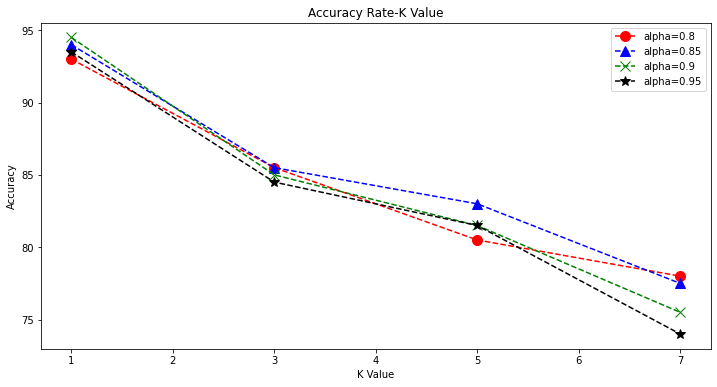

# **LDA**

---



---



Function to calculate the mean of every class and the overall mean 

---



In [ ]:
def calc_mean(train,number):
  mean = []
  for i in range (1,number+1):
    temp = []
    for j in range (((i-1)*5),(i*5)):
      temp.append(train[j])
    temp=np.array(temp)
    meanVector=temp.mean(axis=0)
    meanVector=np.array(meanVector)
    mean.append(meanVector)
  mean=np.array(mean)
  temp=np.array(temp)
  overall_mean=mean.mean(axis=0)
  overall_mean=np.array(overall_mean)
  return mean,overall_mean

Calculating the mean of every class and overall mean and printing their shape

---



In [ ]:
mean,overall_mean=calc_mean(train,40)
print(mean.shape)
print(overall_mean.shape)

(40, 10304)
(10304,)


Function to calculate the between class scatter matrix

---



In [ ]:
def calc_between_class(mean,overall_mean,n,number):
  sum=[]
  temp=mean[0]-overall_mean
  temp=temp.reshape(-1,1)
  sum=np.dot(temp,temp.transpose())

  for i in range(1,number):
    temp=mean[i]-overall_mean
    temp=temp.reshape(-1,1)
    sum=sum+(np.dot(temp,temp.transpose()))
  sum=np.array(sum*n)
  return sum

Calculating the Sb and printing its shape

---



In [ ]:
S_b=calc_between_class(mean,overall_mean,5,40)
print (S_b.shape)

(10304, 10304)


Function to calculate the S (within class scatter matrix)

---



In [ ]:
def calc_s(n,train,mean):
  s=np.zeros((10304,10304))
  for i in range(0,n):
    x=[]
    for j in range(i*5,i*5+5):
      z=train[j]-mean[i]
      x.append(z)
    temp=np.array(x) 
    s=np.array(s)    
    s+=np.dot(temp.transpose(),temp)
  x=np.array(x)
  return s 

Calculating S and printing its shape

---



In [ ]:
S=calc_s(40,train,mean)
print(S.shape)

(10304, 10304)


Calculating S inverse

---



In [ ]:
s_1=np.linalg.inv(S)

Calculating dot product of S inverse and Sb

---



In [ ]:
result=np.dot(s_1,S_b)

Calculating eigen values and eigen vectors

---



In [ ]:
eigen_value,eigen_vector=np.linalg.eigh(result)

Taking the 39 dominant eigenvectors and calculating the projection matrix

---



In [ ]:
LDA_max_bias=[39]
lda_proj=reduced_basis(eigen_vector,LDA_max_bias,0)


Printing the projection matrix shape

---



In [ ]:
print(lda_proj.shape)

(39, 10304)


Projecting the train & test datasets using the projection matrix

---



In [ ]:
reduced_train=np.matmul(train,lda_proj.transpose())
reduced_test=np.matmul(test,lda_proj.transpose())

Calculating the accuracy of the LDA function 

---



In [ ]:
acc_lda=accuracy_calc(reduced_train,reduced_test,train_labels,test_labels)
print(acc_lda)

[94.5, 87.0, 84.0, 79.0]


Function to plot the relation between K value and accuracy rate in LDA 

---




In [ ]:
def plot_lda(list1):
  neighbors = [1,3,5,7]
  plt.figure(figsize=(12, 6))
  plt.plot(neighbors, list1, color='red', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
  
  plt.title('Accuracy Rate K Value')
  plt.xlabel('K Value')
  plt.ylabel('Accuracy')

Plotting the results

---



In [ ]:
plot_lda(acc_lda)

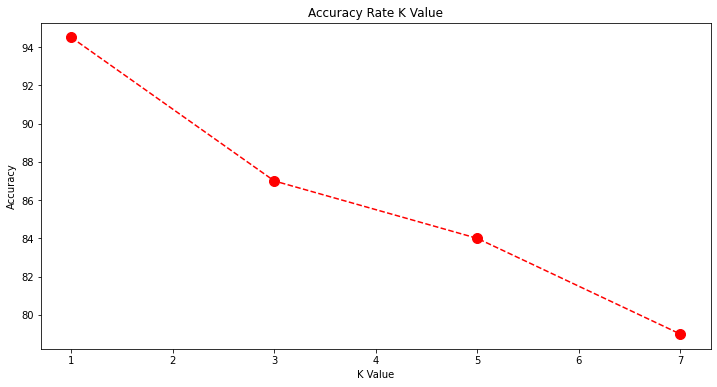

### **Accuarcy in LDA is slightly higher than in PCA**


# **Compare vs Non-Face Images**

---



---



## **PCA** 

---



---



Generating the Data Matrix and the Label vector 

---



In [ ]:
import cv2
import numpy as np

data1 = []
labels1=[]
for i in range(1, 41):  # accessing folders of directory
        for k in range(1, 11):  # accessing photos in each folder
            img = cv2.imread('/content/gdrive/MyDrive/Dataset'+'/s'+str(i)+"/"+str(k)+'.pgm', 0)
            img_col = np.array(img, dtype='float64').flatten()  # converting image to 1 dimentional image
            data1.append(img_col)
            labels1.append(1)
dim = (92,112)
for i in range(1,401):
  img = cv2.imread('/content/gdrive/MyDrive/nonfaces'+'/n'+str(i)+'.jpg', 0)
  resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
  img_col = np.array(resized, dtype='float64').flatten()  # converting image to 1 dimentional image
  data1.append(img_col)
  labels1.append(0)

data1 = np.array(data1)

Calculating the eigen values & eigen vectors in the PCA method 

---



In [ ]:
train1,train_labels1,test1,test_labels1=split(data1,labels1,2)
covariance1=cov(train1)
eigen_value1,eigen_vector1=np.linalg.eigh(covariance1)

Calculating the explained variance and printing them

---



In [ ]:
explained_variance1=exp_var(eigen_value1)
print(explained_variance1)

[47, 71, 111, 185]


Calculating the reduced basis (Projection Matrix) for every given alpha


---



In [ ]:
alpha1nf=reduced_basis(eigen_vector1,explained_variance1,0)
alpha2nf=reduced_basis(eigen_vector1,explained_variance1,1)
alpha3nf=reduced_basis(eigen_vector1,explained_variance1,2)
alpha4nf=reduced_basis(eigen_vector1,explained_variance1,3)

Projecting all the training sets using the projection matrix

---



In [ ]:
reduced_train1nf=np.matmul(train1,alpha1nf.transpose())
reduced_train2nf=np.matmul(train1,alpha2nf.transpose())
reduced_train3nf=np.matmul(train1,alpha3nf.transpose())
reduced_train4nf=np.matmul(train1,alpha4nf.transpose())

Projecting all the test sets using the projection matrix

---



In [ ]:
reduced_test1nf=np.matmul(test1,alpha1nf.transpose())
reduced_test2nf=np.matmul(test1,alpha2nf.transpose())
reduced_test3nf=np.matmul(test1,alpha3nf.transpose())
reduced_test4nf=np.matmul(test1,alpha4nf.transpose())

Calculating the accuracy of the 4 datasets

---



In [ ]:
acc_alpha1nf=accuracy_calc(reduced_train1nf,reduced_test1nf,train_labels1,test_labels1)
acc_alpha2nf=accuracy_calc(reduced_train2nf,reduced_test2nf,train_labels1,test_labels1)
acc_alpha3nf=accuracy_calc(reduced_train3nf,reduced_test3nf,train_labels1,test_labels1)
acc_alpha4nf=accuracy_calc(reduced_train4nf,reduced_test4nf,train_labels1,test_labels1)

Printing the accuracy of all the datasets, every dataset accuracy is calculated in an array

---



In [ ]:
print(acc_alpha1nf)
print(acc_alpha2nf)
print(acc_alpha3nf)
print(acc_alpha4nf)

[99.25, 99.0, 98.75, 98.5]
[98.5, 99.0, 98.5, 98.5]
[98.5, 97.5, 98.25, 97.25]
[98.75, 96.75, 96.75, 96.0]


Plotting the results

---



In [ ]:
graph(acc_alpha1nf,acc_alpha2nf,acc_alpha3nf,acc_alpha4nf)

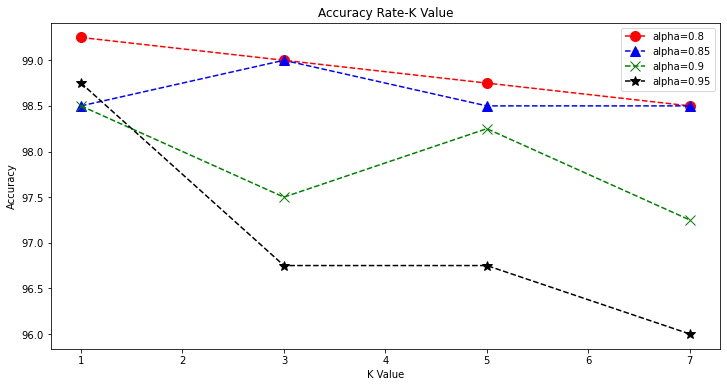

## **LDA**

---



---



Calculating the mean of every class and overall mean and printing their shape

---



In [ ]:
mean1,overall_mean1=calc_mean(train1,2)
print(mean1.shape)
print(overall_mean1.shape)

(2, 10304)
(10304,)


Calculating the Sb and printing its shape

---



In [ ]:
S_b1=calc_between_class(mean1,overall_mean1,200,2)
print (S_b1.shape)

(10304, 10304)


Calculating S and printing its shape

---



In [ ]:
S1=calc_s(2,train1,mean1)
print(S1.shape)

(10304, 10304)


Calculating S inverse

---



In [ ]:
s_11=np.linalg.inv(S1)

Calculating dot product of S inverse and Sb

---



In [ ]:
result1=np.dot(s_11,S_b1)

Calculating eigen values and eigen vectors

---



In [ ]:
eigen_value1,eigen_vector1=np.linalg.eigh(result1)

Taking the 20 dominant eigenvectors, calculating the projection matrix and printing its shape
---



In [ ]:
LDA_max_bias=[20]
lda_proj1=reduced_basis(eigen_vector1,LDA_max_bias,0)
print(lda_proj1.shape)

(20, 10304)


Projecting the train & test datasets using the projection matrix

---



In [ ]:
reduced_train1=np.matmul(train1,lda_proj1.transpose())
reduced_test1=np.matmul(test1,lda_proj1.transpose())

Calculating the accuracy of the LDA function 

---



In [ ]:
acc_lda1=accuracy_calc(reduced_train1,reduced_test1,train_labels1,test_labels1)
print(acc_lda1)

[90.0, 89.25, 90.5, 90.5]


Plotting the results

---



In [ ]:
plot_lda(acc_lda1)

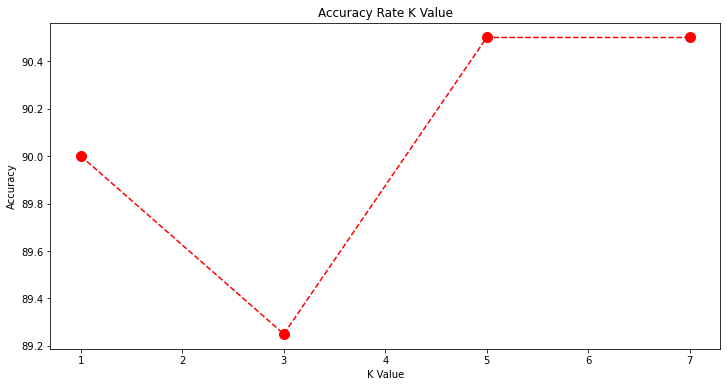

Graphs below represents accuracy for PCA & LDA when datasets consists of 80 face images & 80 non-face images

---



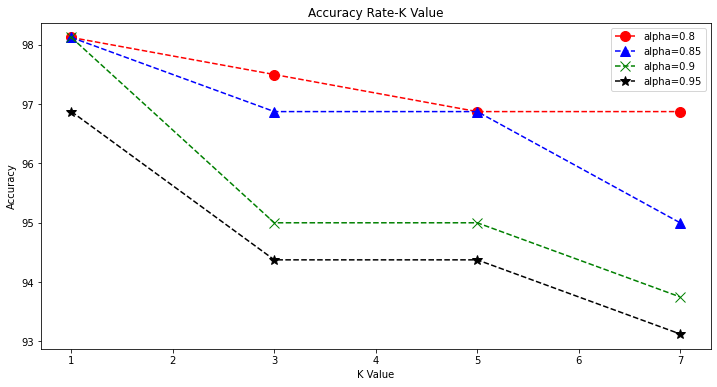

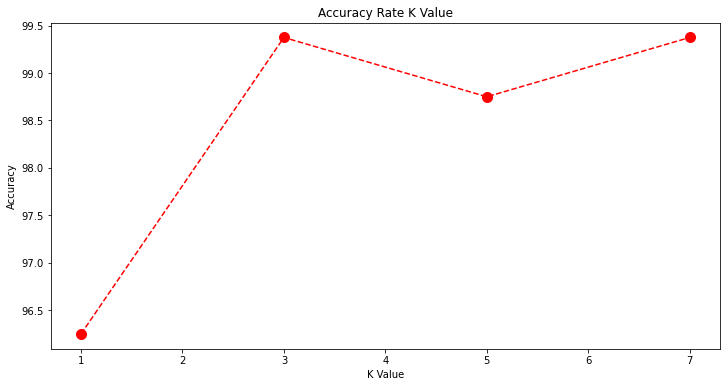